In [94]:
import osmnx as ox
import networkx as nx
from pprint import pprint
import numpy as np
import math
from random import random

### С помощью библиотеки osmnx скачиваем наш граф дорог города Казань

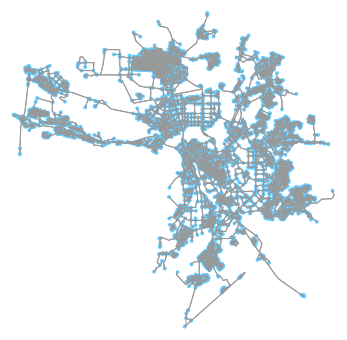

In [3]:
import matplotlib.pyplot as plt

place = {'city' : 'Kazan',
         'country' : 'Russia'}
G = ox.graph_from_place(place, network_type='drive')


fig, ax = ox.plot_graph(G)

#### Узлы нашего графа

In [5]:
G.nodes()

NodeView((411385856, 411385858, 411385859, 411385860, 863944711, 863944714, 1835352078, 959119377, 959119378, 1931214868, 872562710, 873775127, 2427535384, 3664281626, 842432538, 1977794586, 835780640, 872562725, 2649833509, 722796584, 863944756, 722796597, 2337947701, 722796605, 863944771, 873775177, 849772623, 722796625, 863944793, 722796634, 863944797, 722796639, 842432607, 842432609, 863944801, 835780708, 835780713, 842432632, 842432636, 722796670, 722796671, 1939685502, 720535683, 863944835, 1705607307, 720535694, 722796695, 842432663, 1705607322, 1939685532, 835780765, 2051923236, 4014964900, 4014964901, 722796711, 3579166889, 3579166892, 3949478066, 842432702, 872562879, 842432704, 835780804, 730382538, 842432715, 872562891, 730382542, 730382544, 835780818, 730382549, 863944917, 666304734, 283181279, 2597437665, 842432738, 283181283, 666304739, 1222688994, 283181292, 283181293, 283181294, 842432749, 666304752, 666304753, 730382575, 873776476, 283181314, 835780867, 666304773, 666

#### Нахождение расстояний между смежными узлами

In [21]:
a = G.adj
dictionary = {}
i = 0
for key, value in a.items():
    if i == 10:
        break
    for key_a, value_a in value.items():

        if key not in dictionary:
            dictionary[key] = [{key_a:value_a[0]['length']}]
        else:
            dictionary[key].append({key_a:value_a[0]['length']})                  
pprint(dictionary)

{76483453: [{654650848: 276.884}, {298140601: 400.68}],
 181289671: [{256442269: 7080.341}],
 256440153: [{722796605: 292.989}],
 256442184: [{894764363: 656.815}],
 256442269: [{607758622: 409.174}, {256442184: 596.732}],
 256442307: [{607758621: 78.107}, {256440153: 339.912}],
 256442324: [{654650635: 77.435}],
 281693118: [{1256492834: 325.734}, {1876017445: 210.357}, {411306456: 32.549}],
 281693416: [{484223310: 18.164}],
 282503434: [{422772248: 767.023},
             {411494416: 410.068},
             {411494387: 224.447},
             {298124619: 611.673}],
 282505660: [{701703333: 8.943}, {3693618449: 790.612}],
 282505662: [{868452336: 19.11}, {895549427: 382.871}, {701703333: 461.939}],
 282505665: [{484223312: 17.586}, {708334719: 693.773}],
 282505842: [{819219829: 8.811}, {946681700: 219.357}, {298122389: 287.45}],
 282767392: [{282767424: 246.418}, {411306456: 264.608}],
 282767424: [{283162982: 561.98}],
 282768883: [{1256492834: 430.298}, {819273370: 711.468}, {2446549

 666304753: [{2388829153: 72.485}, {836418539: 1753.225}, {2388829160: 44.405}],
 666304773: [{836786824: 166.857}, {666304774: 188.139}, {836788242: 310.914}],
 666304774: [{666304773: 188.139},
             {836098193: 156.592},
             {666304777: 249.562},
             {2396964155: 114.063}],
 666304777: [{666304778: 12.737}, {836788049: 137.693}, {666304774: 249.562}],
 666304778: [{666304777: 12.737}, {836788706: 92.928}, {656633413: 191.012}],
 666304783: [{2852246705: 121.266}, {836418539: 227.712}, {836418350: 149.96}],
 666304784: [{656633427: 1170.012}, {2491082166: 469.116}, {656633413: 516.27}],
 666304785: [{894764295: 25.03}, {2393598534: 8.043}, {720525337: 232.309}],
 666304789: [{3757828559: 362.386},
             {5351617031: 693.168},
             {5723723042: 344.333}],
 666304803: [{895593892: 1118.897},
             {746931311: 516.276},
             {746933416: 1191.658}],
 690236978: [{690237016: 108.191}, {1072310158: 82.662}],
 690237016: [{410878303: 77

 828128441: [{5729293783: 92.567}, {828128961: 277.29}, {1038217524: 126.806}],
 828128444: [{2021214481: 301.185}, {422772341: 260.593}],
 828128448: [{828128239: 95.946}, {828129088: 154.016}, {828128390: 88.524}],
 828128455: [{828128383: 74.648}, {5739382411: 244.188}, {828128436: 87.12}],
 828128460: [{828128777: 301.202}, {828129168: 96.017}, {828128928: 95.024}],
 828128483: [{2146158632: 123.428},
             {2146158646: 205.528},
             {828128731: 152.597},
             {2146158640: 176.108}],
 828128487: [{2021214669: 82.879}, {828129064: 326.962}, {828128929: 169.381}],
 828128493: [{828128739: 90.198}, {828129134: 346.022}, {1654901189: 93.174}],
 828128494: [{828128658: 152.31}],
 828128496: [{828128583: 103.758}, {828128513: 112.038}, {828128741: 344.818}],
 828128511: [{828128842: 284.379}],
 828128513: [{1939685727: 69.51}, {828129167: 330.362}, {828128496: 112.038}],
 828128515: [{828128376: 384.679},
             {828128523: 392.687},
             {828128687:

 863940880: [{867147856: 145.832},
             {863945095: 143.353},
             {863943353: 69.359},
             {863946404: 72.821}],
 863940888: [{863947357: 56.802}, {863941661: 68.694}, {863941744: 175.282}],
 863940933: [{863950042: 229.936},
             {865261666: 271.343},
             {863945453: 82.619},
             {863941362: 69.432}],
 863940965: [{863948962: 72.296}, {863940267: 82.075}, {863943256: 325.287}],
 863940972: [{863943470: 67.235}, {863943038: 26.896}, {411325578: 67.508}],
 863941073: [{863948716: 263.3},
             {863943060: 227.948},
             {863943542: 75.274},
             {863940168: 71.148}],
 863941096: [{863946073: 79.728},
             {863948794: 83.608},
             {863943867: 239.096},
             {863945620: 252.715}],
 863941104: [{863943123: 64.887},
             {7098856015: 171.223},
             {863942861: 104.212},
             {976472225: 172.036}],
 863941106: [{863948763: 86.666},
             {863941454: 68.035},
    

             {889237402: 180.602},
             {1110794728: 181.237}],
 889238110: [{889237840: 73.885},
             {889239265: 72.233},
             {889238268: 142.707},
             {889238920: 135.577}],
 889238113: [{889238096: 84.282},
             {889237238: 110.451},
             {3100295453: 56.961},
             {1110792252: 160.687}],
 889238146: [{889239113: 68.492}, {889238760: 161.588}, {889238920: 69.983}],
 889238183: [{889238512: 303.629}, {889239475: 60.835}, {889237693: 73.476}],
 889238189: [{889237840: 141.85}, {889238950: 73.437}, {889238268: 73.961}],
 889238194: [{889237805: 136.171}, {889237203: 62.042}, {889237060: 69.639}],
 889238197: [{889237451: 71.474},
             {889237855: 201.153},
             {889239106: 177.501},
             {889238014: 64.2}],
 889238200: [{889237808: 214.246}, {889236992: 55.424}, {889237191: 81.98}],
 889238233: [{1110795595: 47.517},
             {889236992: 88.511},
             {3094654388: 307.252},
             {1110

 1038640280: [{1037458326: 86.302}, {1038640216: 58.749}, {1038639179: 39.815}],
 1038640338: [{1038638968: 60.4},
              {411295452: 59.059},
              {1038638077: 110.216},
              {1038636091: 54.143}],
 1038640604: [{1038637943: 281.768}],
 1038640616: [{1038639157: 415.797}, {411824386: 623.84}, {293667956: 526.984}],
 1038640664: [{1038638401: 178.75}],
 1038640675: [{1038638344: 207.032},
              {1038637952: 328.678},
              {1038639112: 159.177}],
 1038897625: [{1038897637: 205.237}, {298122400: 303.64}],
 1038897628: [{2046143465: 108.867},
              {1038897632: 135.379},
              {2046143496: 144.139}],
 1038897632: [{1038897646: 275.535},
              {1038897634: 49.03},
              {1038897628: 135.379}],
 1038897634: [{1038897632: 49.03}, {1038897637: 40.32}, {5250950366: 392.085}],
 1038897637: [{1038899624: 56.006}, {1038897625: 205.237}, {1038897634: 40.32}],
 1038897646: [{1038897632: 275.535},
              {1038897647: 11

 1308473473: [{1503873363: 676.361}, {2338129743: 273.992}],
 1309864196: [{1309864244: 166.149},
              {1938631625: 272.759},
              {4874454118: 101.036}],
 1309864208: [{1309864255: 91.363}],
 1309864228: [{295042409: 113.437},
              {505400305: 142.097},
              {1309864277: 127.915}],
 1309864244: [{951620857: 246.714},
              {1832406965: 203.284},
              {1309864196: 166.149},
              {1309864273: 191.286}],
 1309864255: [{1309864208: 91.363}, {505400305: 133.241}, {965716294: 81.17}],
 1309864273: [{1309864244: 191.286},
              {3631695737: 129.388},
              {1938631624: 267.414},
              {293667928: 570.817}],
 1309864277: [{1309864228: 127.915}],
 1311562230: [{872562879: 74.044}, {738197293: 198.179}, {1311562231: 171.195}],
 1311562231: [{1311562230: 171.195}, {738197293: 100.092}, {872564607: 73.376}],
 1313961764: [{1313961790: 530.058}],
 1313961766: [{1328885796: 159.841}],
 1313961767: [{2420624850: 26

 1939684681: [{1939684929: 149.892}, {1939684351: 334.775}],
 1939684929: [{1939684957: 12.832}, {1939684681: 149.892}],
 1939684957: [{1939684929: 12.832}],
 1939685176: [{828129137: 71.238}, {1939685727: 277.534}, {828128226: 187.581}],
 1939685244: [{828128192: 85.961}, {828129042: 112.989}, {1939685532: 243.798}],
 1939685502: [{3641130770: 44.303}, {3641130784: 308.61}, {3777908389: 50.009}],
 1939685532: [{1939685244: 243.798}, {828129137: 171.052}, {828128226: 68.305}],
 1939685727: [{828128513: 69.51}, {4789658452: 114.723}, {1939685176: 277.534}],
 1939685838: [{1939685889: 112.569}],
 1939685889: [{828128226: 124.614},
              {1939685938: 49.815},
              {1939685838: 112.569}],
 1939685938: [{1939685889: 49.815}, {828129167: 40.486}, {1939686003: 296.852}],
 1939686003: [{1939685938: 296.852}],
 1939686194: [{1939686531: 286.189}, {828129167: 88.759}, {828128741: 20.391}],
 1939686311: [{828128884: 147.126},
              {3521337716: 73.319},
              {828

              {3521337736: 218.578}],
 3521337733: [{3521337732: 81.532},
              {828128306: 336.524},
              {3521337734: 202.646}],
 3521337734: [{3521337733: 202.646}],
 3521337736: [{3866822171: 140.341},
              {1992199218: 61.005},
              {3521337732: 218.578}],
 3521337741: [{5729293813: 191.789},
              {4747106707: 113.717},
              {3521337751: 367.774}],
 3521337742: [{828128409: 82.805}, {3521337751: 120.031}, {828128544: 281.724}],
 3521337743: [{3521337751: 28.049}, {3521337744: 47.973}, {4180461390: 83.412}],
 3521337744: [{3521337745: 36.24}, {3521337750: 52.287}, {3521337743: 47.973}],
 3521337745: [{3521337744: 36.24}],
 3521337750: [{3521337744: 52.287},
              {828128707: 263.909},
              {3673640169: 111.145}],
 3521337751: [{3521337743: 28.049},
              {3521337742: 120.031},
              {3521337741: 367.774}],
 3521357377: [{828128571: 255.241}, {828128669: 115.669}, {3525939843: 29.373}],
 3525939843

#### Создаем список из вершин графа

Он нам понадобиться в дальнейшем при заполнении матрицы расстояний

In [42]:
nodes_list = list(G.nodes())
len(nodes_list)

7024

### Работа с больницами и домами

In [46]:
buildings = ox.footprints.footprints_from_place(place, footprint_type='building', retain_invalid=False, which_result=1)

#### Сохранение id больниц и домов в списки


Выбираем из первых 10000 зданий 10 больниц и 100 домов

In [48]:
hospital = []
apartments = []
n = 10000
build = buildings.head(n)['building'].to_dict()

for key,value in build.items():
    if value == 'hospital':
        hospital.append(key)
    elif value == 'apartments':
        apartments.append(key)

print(hospital[:10])
print(apartments[:100])
#print(build)

hospitals = hospital[:10]
apartments = apartments[:100]

[61424274, 61424329, 62040317, 62040327, 62040340, 72775188, 72775515, 72775583, 72775638, 72775692]
[56255883, 56255887, 56255889, 56255891, 56255892, 56255893, 56255896, 56255897, 56255898, 56255899, 56255900, 56255901, 56255906, 56255907, 56255910, 56255911, 56255912, 56255913, 56255914, 56255915, 61424177, 61424184, 61424186, 61424188, 61424193, 61424195, 61424197, 61424199, 61424203, 61424205, 61424206, 61424208, 61424209, 61424210, 61424213, 61424215, 61424229, 61424230, 61424235, 61424238, 61424246, 61424248, 61424250, 61424252, 61424256, 61424262, 61424264, 61424272, 61424280, 61424282, 61424284, 61424288, 61424290, 61424293, 61424300, 61424307, 61424309, 61424311, 61424313, 61424314, 61424315, 61424319, 61424322, 61424327, 61424332, 61424337, 61424338, 61424344, 61424348, 61424349, 61424362, 61424367, 61424373, 61424380, 61424381, 61424387, 61424389, 61424390, 61424392, 61424394, 61424396, 61424406, 61424410, 61424412, 61424416, 61424418, 61424420, 61424423, 61424428, 61424430

#### Нахождение ближайших узлов для домов и больниц

In [77]:
a = buildings.head(n).to_dict()
hospitals_dict = {}
apartments_dict = {}

print('Больницы')
for i in hospitals:   
    bounds = a['geometry'][i].bounds
    nearest_node = ox.get_nearest_node(G, ((bounds[1]+bounds[3])/2, (bounds[0]+bounds[2])/2))
    hospitals_dict[i] = nearest_node
    print(i, nearest_node)
print('------------------')
print('Апартаменты')
for i in apartments:
    bounds = a['geometry'][i].bounds    
    nearest_node = ox.get_nearest_node(G, ((bounds[1]+bounds[3])/2, (bounds[0]+bounds[2])/2))
    apartments_dict[i] = nearest_node
    print(i, nearest_node)

Больницы
61424274 738200564
61424329 738200564
62040317 1430001830
62040327 775830916
62040340 773304756
72775188 411324758
72775515 411324765
72775583 861434955
72775638 1251018065
72775692 411324795
------------------
Апартаменты
56255883 730355743
56255887 295857558
56255889 484260741
56255891 484260736
56255892 484260739
56255893 534317522
56255896 419830632
56255897 534317522
56255898 419830632
56255899 419830632
56255900 730355768
56255901 295857558
56255906 534317530
56255907 534317530
56255910 3556716975
56255911 484262336
56255912 480690028
56255913 1174838843
56255914 446258388
56255915 1174839583
61424177 1967868583
61424184 847711650
61424186 739162326
61424188 1561540191
61424193 1571092305
61424195 1068922046
61424197 1806029749
61424199 739162327
61424203 1068922016
61424205 423155339
61424206 720459668
61424208 513783875
61424209 1967868578
61424210 972498348
61424213 766889336
61424215 1068922016
61424229 720459668
61424230 720459668
61424235 972498348
61424238 5137838

### Матрица смежности графа

In [100]:
G_pd = nx.to_pandas_adjacency(G)
print(G_pd)

           411385856   411385858   411385859   411385860   863944711   \
411385856         0.0         1.0         0.0         0.0         0.0   
411385858         0.0         0.0         1.0         0.0         0.0   
411385859         0.0         1.0         0.0         1.0         0.0   
411385860         1.0         0.0         0.0         0.0         0.0   
863944711         0.0         0.0         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
411385847         0.0         0.0         0.0         0.0         0.0   
895549428         0.0         0.0         0.0         0.0         0.0   
842432506         0.0         0.0         0.0         0.0         0.0   
502874107         0.0         0.0         0.0         0.0         0.0   
872562687         0.0         0.0         0.0         0.0         0.0   

           863944714   1835352078  959119377   959119378   1931214868  ...  \
411385856         0.0         0.0         0.0

#### Преобразовываем из датафрейма в матрицу для удобства

In [101]:
G_pd = G_pd.values

### Заполнение матрицы смежности расстояниями между смежными узлами

С учетом веса узлов, соответствующих больницам

In [102]:
for i in range(len(G_pd)):
    for j in range(len(G_pd)):
        if G_pd[i][j] == 1:
            for k in range(len(dictionary[nodes_list[i]])):
                if nodes_list[j] in dictionary[nodes_list[i]][k].keys():
                    distance = dictionary[nodes_list[i]][k][nodes_list[j]]   
            weight = 1
            if nodes_list[i] in hospitals_dict.values():
                weight = random() + 1
            G_pd[i][j] = distance * weight
# здесь нужно где 0 заполнить гигантскими расстояниями для дальнейшего нахождения крастчайших путей
# я просто для наглядности матрицы закомментировала
#         if G_pd[i][j] == 0:
#             G_pd[i][j] = 1000000

In [103]:
print(G_pd)

[[  0.    124.984   0.    ...   0.      0.      0.   ]
 [  0.      0.    210.64  ...   0.      0.      0.   ]
 [  0.    210.64    0.    ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]


Создаем словарь {id узла}: {его index в списке узлов}

In [79]:
nodes_numbers = {}
for index,i in enumerate(nodes_list):
    nodes_numbers[i]=index
pprint(nodes_numbers)
    

{76483453: 1281,
 181289671: 223,
 256440153: 5922,
 256442184: 6943,
 256442269: 6990,
 256442307: 7001,
 256442324: 7006,
 281693118: 1311,
 281693416: 1411,
 282503434: 4376,
 282505660: 5341,
 282505662: 5342,
 282505665: 5344,
 282505842: 5452,
 282767392: 5123,
 282767424: 5137,
 282768883: 5782,
 282770816: 6689,
 282770852: 6710,
 282770930: 6750,
 282770934: 6751,
 282777123: 2295,
 282777146: 2306,
 282777362: 2395,
 282777364: 2396,
 282777368: 2399,
 283035624: 903,
 283035625: 904,
 283035626: 906,
 283162235: 5841,
 283162245: 5844,
 283162246: 5845,
 283162982: 6142,
 283163005: 6153,
 283168354: 1535,
 283168360: 1538,
 283168379: 1543,
 283168403: 1550,
 283179277: 6104,
 283179371: 6143,
 283179372: 6144,
 283179374: 6145,
 283179376: 6146,
 283181279: 71,
 283181283: 74,
 283181292: 77,
 283181293: 78,
 283181294: 79,
 283181314: 85,
 283181324: 91,
 283181327: 93,
 283181346: 106,
 283181355: 109,
 283181358: 110,
 283181359: 112,
 283181360: 113,
 283181362: 114,
 

 784657190: 4621,
 784657203: 4628,
 784657209: 4629,
 784657219: 4644,
 795813472: 4115,
 803174874: 6186,
 803200504: 3281,
 803200634: 3337,
 803560740: 6538,
 803560749: 3191,
 803560750: 3192,
 803560751: 3193,
 817447806: 278,
 817447859: 292,
 817608916: 6065,
 817608965: 6097,
 819219798: 1454,
 819219829: 1464,
 819219866: 1472,
 819219911: 1488,
 819219942: 1497,
 819273370: 3362,
 819273462: 3418,
 819302463: 1713,
 819336215: 2071,
 819336219: 2073,
 819336229: 2078,
 819336236: 2081,
 819336246: 2083,
 820932521: 5058,
 821465232: 1727,
 824135009: 1457,
 824135010: 1458,
 824135018: 1462,
 824284795: 2334,
 824801164: 5935,
 824801172: 5936,
 824801174: 5937,
 824801182: 5938,
 824801183: 5939,
 824801197: 5941,
 824801199: 5942,
 824801213: 5947,
 824801222: 5949,
 824801230: 5952,
 824801237: 5953,
 824801252: 5956,
 824801253: 5957,
 824801257: 5962,
 824801261: 5967,
 824801265: 5975,
 824801272: 5977,
 824801309: 5991,
 824801316: 5996,
 824801320: 5998,
 824801323: 

 865260992: 2236,
 865261010: 307,
 865261021: 2259,
 865261029: 2262,
 865261051: 2280,
 865261054: 2281,
 865261058: 2285,
 865261067: 2290,
 865261070: 2291,
 865261072: 2292,
 865261089: 2294,
 865261092: 2296,
 865261094: 2304,
 865261119: 2308,
 865261122: 2310,
 865261136: 2315,
 865261156: 2322,
 865261160: 2325,
 865261166: 2327,
 865261168: 2328,
 865261174: 2330,
 865261183: 2339,
 865261206: 2352,
 865261217: 2355,
 865261222: 2356,
 865261228: 2357,
 865261256: 2364,
 865261278: 2371,
 865261285: 2377,
 865261295: 2380,
 865261308: 2384,
 865261311: 2385,
 865261317: 2391,
 865261322: 2392,
 865261351: 2403,
 865261361: 2404,
 865261367: 2409,
 865261380: 2412,
 865261383: 2413,
 865261403: 2416,
 865261409: 2419,
 865261417: 2420,
 865261428: 2424,
 865261433: 2426,
 865261440: 2429,
 865261461: 2439,
 865261474: 2446,
 865261476: 2447,
 865261523: 2460,
 865261525: 2459,
 865261532: 2461,
 865261536: 2464,
 865261582: 2476,
 865261588: 2479,
 865261595: 2491,
 865261608:

 1119069812: 4126,
 1119069883: 4135,
 1119069993: 4167,
 1119070027: 4171,
 1119070057: 4180,
 1119070117: 4203,
 1119070147: 4212,
 1119070169: 4223,
 1119070177: 4224,
 1119070214: 4235,
 1119070231: 4242,
 1119070241: 4247,
 1119070277: 4271,
 1119070298: 4292,
 1119070307: 4297,
 1119070493: 4387,
 1119070520: 4407,
 1119070528: 4413,
 1119070693: 4497,
 1119070789: 4520,
 1119070800: 4524,
 1119070802: 4526,
 1119070828: 4534,
 1119070842: 4545,
 1119070848: 4548,
 1119070924: 4582,
 1119070983: 4608,
 1119070994: 4612,
 1119071064: 4656,
 1119071085: 4664,
 1119071145: 4675,
 1119071149: 4677,
 1119071174: 4681,
 1119071213: 4699,
 1119071242: 4707,
 1119071249: 4711,
 1119071268: 4716,
 1119597295: 5493,
 1119597550: 5586,
 1119597788: 5672,
 1119926599: 6127,
 1119926985: 6256,
 1119927524: 6597,
 1119927955: 6836,
 1120201582: 4665,
 1121684660: 1395,
 1121702645: 1988,
 1121703402: 2266,
 1121705295: 3209,
 1121757985: 4618,
 1124640840: 4273,
 1124640847: 4279,
 1124640849:

 2062136422: 5628,
 2062136423: 5629,
 2062136424: 5630,
 2062136428: 5632,
 2062136429: 5633,
 2062136436: 5639,
 2062136439: 5641,
 2062136441: 5643,
 2062136446: 5647,
 2062136448: 5648,
 2062136452: 5650,
 2062136456: 5651,
 2062136459: 5653,
 2062136521: 5669,
 2062136523: 5670,
 2062136605: 5704,
 2062136611: 5709,
 2068284704: 529,
 2068284874: 664,
 2068285058: 769,
 2068285181: 812,
 2068285205: 819,
 2068285487: 947,
 2068285509: 961,
 2068285554: 980,
 2068285805: 1077,
 2068285823: 1082,
 2083511316: 3005,
 2088963500: 1480,
 2089508797: 3496,
 2090112091: 2092,
 2090112209: 2138,
 2090112403: 2217,
 2090112423: 2231,
 2091580848: 6720,
 2092887800: 5008,
 2093386581: 1260,
 2093386589: 1266,
 2093386599: 1274,
 2093386600: 1275,
 2103854595: 709,
 2103854604: 715,
 2103854618: 723,
 2103854620: 724,
 2103854621: 725,
 2103854622: 726,
 2103854623: 727,
 2103854624: 729,
 2103854626: 730,
 2103854628: 731,
 2110217805: 3321,
 2110224795: 6165,
 2110302835: 4539,
 2110310007

Для примера ищу расстояние между какой-то больницей и каким-то домом, оно равно 1000000, потому что это не смежные вершины

In [83]:
node1 = hospitals_dict[61424274]
index1 = nodes_numbers[node1]

node2 = apartments_dict[56255883]
index2 = nodes_numbers[node2]

print("Расстояние между этой больницей и домом: ", G_pd[index1][index2])    

Расстояние между этой больницей и домом:  1000000.0
